In [60]:
%run 'init.py'
all_clips=load_files()

loading files...
loaded:
for label=cold, 22 training clips and 7 test clips with total length 869 seconds
for label=hot, 22 training clips and 7 test clips with total length 871 seconds


*****************
<font size="6">Analyze data</font>

max/sd= 5.37534


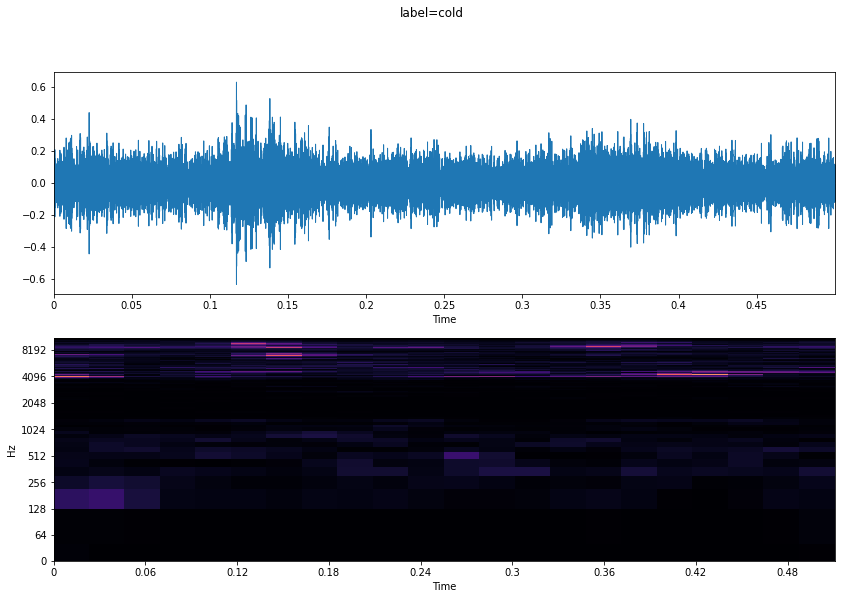




max/sd= 4.01808


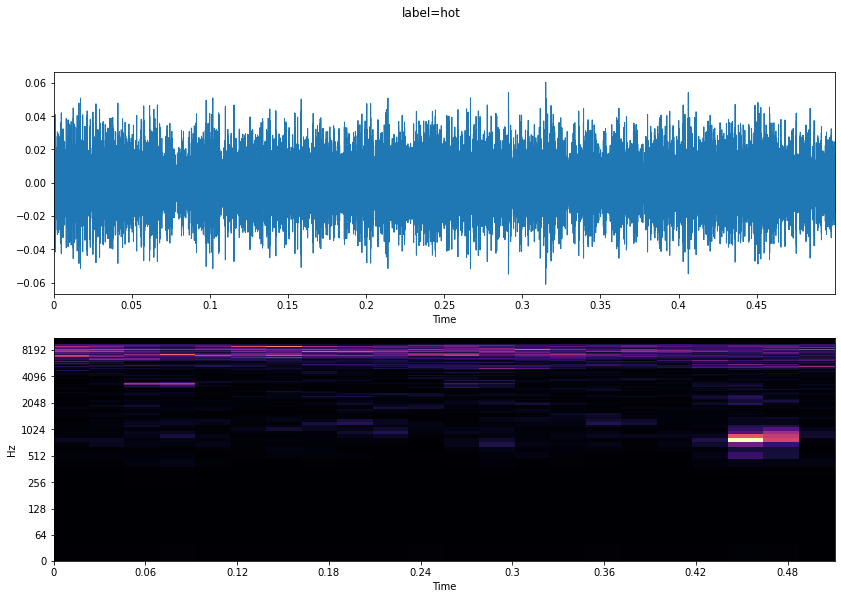

In [72]:
# plot waveform and spectrogram data for a sample from each class

duration=0.5

sample_filter = no_filter

for label in labels:
    sample,sr=generate_sample(duration,label,sample_filter=sample_filter)
    spec=librosa.feature.melspectrogram(sample, sr=sr)
    print("max/sd=",np.max(sample)/np.std(sample))
    
    fig, axs = plt.subplots(2, 1, figsize=(14,9))
    fig.suptitle('label={}'.format(label))
    plt.subplot(211)
    librosa.display.waveplot(sample, sr=sr)
    plt.subplot(212)
    librosa.display.specshow(spec, x_axis='time', y_axis='log')
    plt.show()
    print("\n\n")


In [62]:
# play sample
label=random.choice(labels)
print('{} sample:'.format(label))
sample,sr=generate_sample(3,label)
Audio(sample, rate=sr)

hot sample:


max/sd= 3.3246882


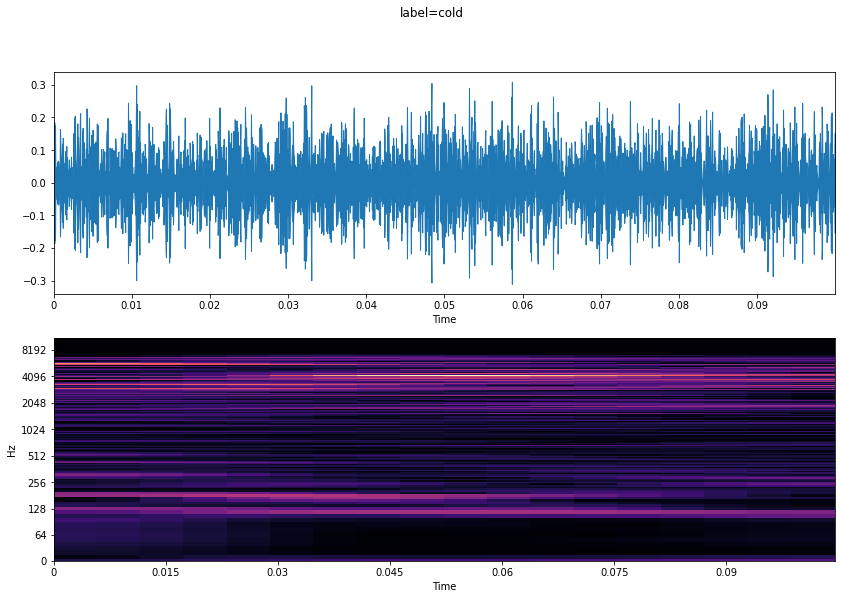




max/sd= 3.9842088


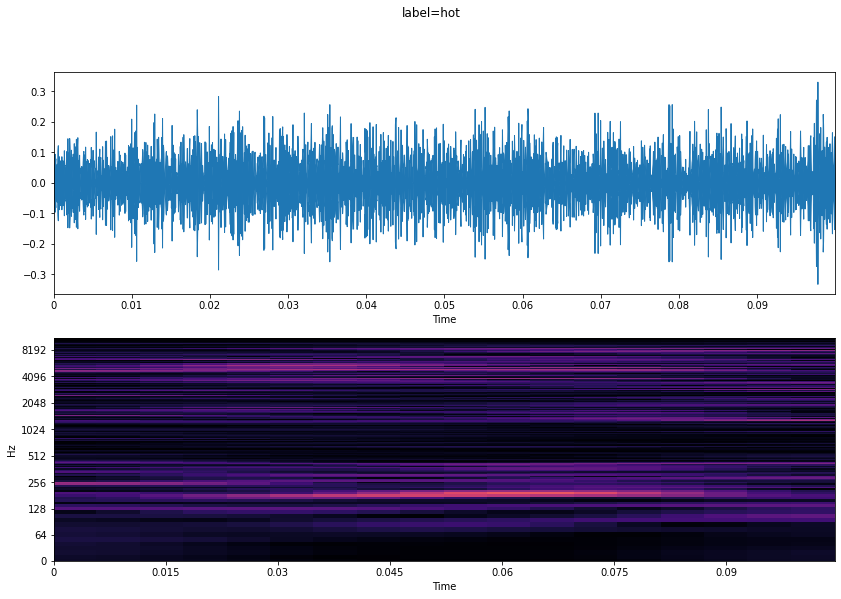

In [63]:
# define max/sd filter
maxsd=5
maxsd_filter = lambda sample : np.max(sample)/np.std(sample)<maxsd

sample_filter = maxsd_filter
n_fft=2048
hop_length=128

for label in labels:
    sample,sr=generate_sample(duration,label,sample_filter=sample_filter)
    spec=np.abs(librosa.stft(sample, n_fft=n_fft,hop_length=hop_length))

    print("max/sd=",np.max(sample)/np.std(sample))
    
    fig, axs = plt.subplots(2, 1, figsize=(14,9))
    fig.suptitle('label={}'.format(label))
    plt.subplot(211)
    librosa.display.waveplot(sample, sr=sr)
    plt.subplot(212)
    librosa.display.specshow(spec, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='log');
    plt.show()
    print("\n\n")

<ipython-input-34-13bd6b860650>:7: RuntimeWarning: invalid value encountered in float_scalars
  maxsd.append(np.max(sample)/np.std(sample))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


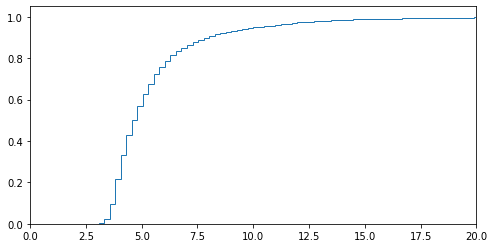

In [34]:
all_data=[]
for label in labels:
    all_data+=all_clips[label]

maxsd=[]
for sample,_,_ in sample_generator(all_data,0.5):
    maxsd.append(np.max(sample)/np.std(sample))
    

fig, ax = plt.subplots(figsize=(8, 4))
maxsd=np.array(maxsd)
ax.hist(maxsd, 100, density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.xlim(0,20)
plt.show()

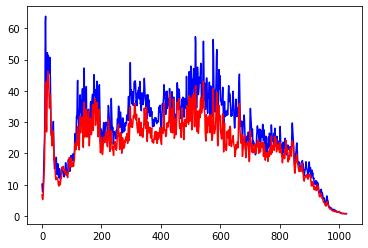

In [76]:
# compare average spectrograms

n_points=1000
duration=0.1
n_fft=2048
hop_length=128
n_freqs=n_fft//2+1

avs=[]
for label in labels:
    spec_data=np.zeros((n_points,n_freqs))
    for i in range(n_points):
        sample,sr=generate_sample(duration,label,sample_filter=no_filter)
        spec_data[i,:]=np.sum(np.abs(librosa.stft(sample, n_fft=n_fft,hop_length=hop_length)),axis=1)
    avs.append(np.mean(spec_data,axis=0))
    

plt.plot(avs[0],color='b')
plt.plot(avs[1],color='r')
plt.show()